# Load the dataset

In [1]:
from sklearn import datasets

In [4]:
import pandas as pd

In [2]:
iris = datasets.load_iris()

In [3]:
iris.keys()

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [6]:
X = pd.DataFrame(iris['data'])

In [8]:
X.columns = iris['feature_names']

In [9]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
y = iris['target']

In [14]:
y.shape

(150, 1)

In [25]:
X_select = X[['petal length (cm)','petal width (cm)']].values # petal length, petal width

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

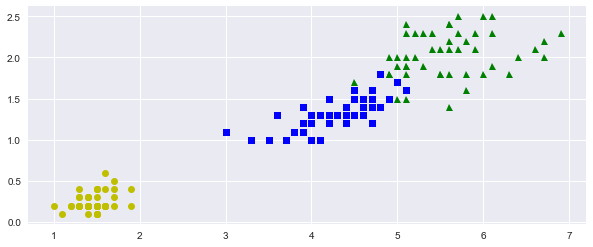

In [27]:
plt.figure(figsize=(10, 4))
plt.plot(X_select[y==2, 0], X_select[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X_select[y==1, 0], X_select[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X_select[y==0, 0], X_select[y==0, 1], "yo", label="Iris-Setosa")

# Fit the Softmax Regression model

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
softmax_clf = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)

In [30]:
softmax_clf.fit(X_select, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
x_plot = np.linspace(0,7,500)
y_plot = np.linspace(0,3,200)

In [35]:
x0,x1 = np.meshgrid(x_plot,y_plot)

In [36]:
x_new = np.c_[x0.ravel(),x1.ravel()]

In [37]:
zz = softmax_clf.predict(x_new).reshape(x0.shape)

In [45]:
y_pred = softmax_clf.predict_proba(x_new)

In [46]:
zz0=y_pred[:,0].reshape(x0.shape)
zz1=y_pred[:,1].reshape(x0.shape)
zz2=y_pred[:,2].reshape(x0.shape)

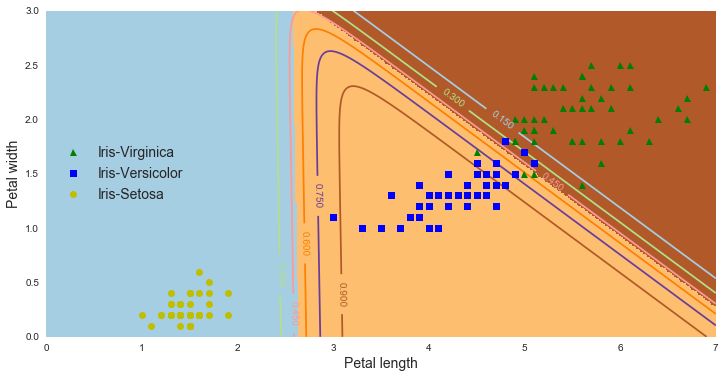

In [54]:
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(X_select[y==2, 0], X_select[y==2, 1], "g^", label="Iris-Virginica")
ax.plot(X_select[y==1, 0], X_select[y==1, 1], "bs", label="Iris-Versicolor")
ax.plot(X_select[y==0, 0], X_select[y==0, 1], "yo", label="Iris-Setosa")
# ax.contourf(x0, x1, zz0)
contour = ax.contour(x0, x1, zz1,cmap=plt.cm.Paired)
# ax.contourf(x0, x1, zz2)
ax.pcolormesh(x0, x1, zz, cmap=plt.cm.Paired)
ax.clabel(contour)
ax.legend(loc="center left", fontsize=14)
ax.set_xlabel("Petal length", fontsize=14)
ax.set_ylabel("Petal width", fontsize=14)